In [1]:
using Distributions
using Random
using StatsPlots

In [160]:
function sim!(X; L=1000, nskips=1000)
    n = length(X)
    M = similar(X, n, L + 1)
    M[:,1] .= X
    for k in 2:L+1
        for _ in 1:nskips
            i = rand(1:n)
            while X[i] < 1 i = rand(1:n) end
            j = rand(1:n)
            X[i] -= 1
            X[j] += 1
        end
        M[:, k] .= X
    end
    M
end

sim! (generic function with 1 method)

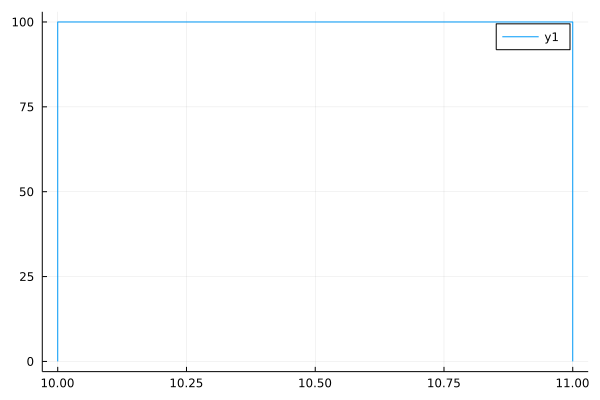

In [161]:
X = fill(10, 100)
stephist(X)

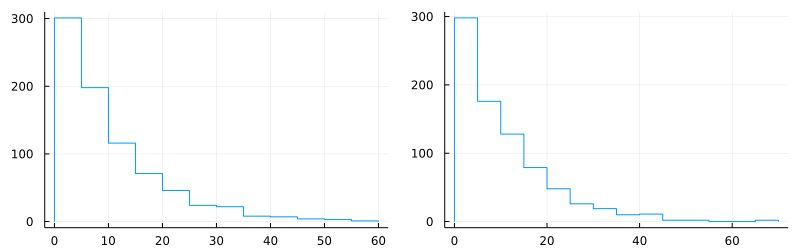

In [172]:
M = sim!(X; nskips=10^6)
plot(stephist(M[1, 201:end]), stephist(M[2, 201:end]); size=(800, 250), legend=false)

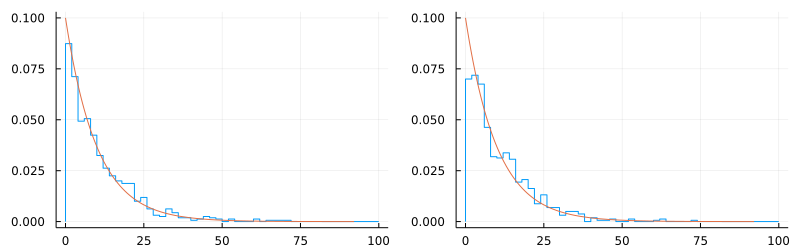

In [191]:
P1 = stephist(M[rand(1:100), 201:end]; norm=true, bin=0:2:100)
plot!(Exponential(10))
P2 = stephist(M[rand(1:100), 201:end]; norm=true, bin=0:2:100)
plot!(Exponential(10))
plot(P1, P2; size=(800, 250), legend=false)

In [174]:
sum(M; dims=1)

1×1001 Matrix{Int64}:
 1000  1000  1000  1000  1000  1000  …  1000  1000  1000  1000  1000  1000

In [175]:
M

100×1001 Matrix{Int64}:
  1  15  14   1   0   4  13  14  11  …  20   1   7   3   5  33  25  14   5
 34  11   9   3   2  15  15  10  15      5   3  13  18  16  14   2  11  10
 15   1   0  40   1  10  18   2  11     10  11   1   6   6  13   4   6   8
  1   7   3  33  26   8   6  15   0     13   8   6   2   1   0   5   3  14
 18   2   1  52  39  10  13   0   6      5   4  24  32   1   0   6   5  16
  1   2   6   2   5   7   4   7  10  …   8   0   8   0  26  10   4   7   3
 24   4   5   6   0   1  10  15   6      4   5   3   1   9  47   8   5  20
  0   3   3  13   2   0  35  13  25     16   4   2   1   9   8  33   0   4
  1  29   1   2  15  30  13   8   5     15  26   1  11   4   6   8  22   0
  4   7   3   0   1   2   3  14   5     41  24  17   3   3   0  15   2  13
  3   0  19   2   3   1  12   2  15  …   8  44   8   1   1  21  21   7   1
  1   7   6   5   4   4   9  13  12     30   6  12   7   9  19   1   6  43
  6   4  25   4   7  12   2  15   2      2   5   2   4   1   0   9  17   8
 